# ELE 435/535 Lab 7: Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.io as io

%matplotlib inline

In [2]:
# The following code is provided for use in this HW
# It generates nx labelled examples from each of two bi-variate Gaussian densities. 
#----------------------------------------------------------------------------------
def multinormaldata(nx, mu1, cov1, mu2, cov2):
    D = np.zeros((2*nx,2), float)
    D[0:nx,:] = np.random.multivariate_normal(mu1, cov1, nx)
    D[nx:2*nx,:] = np.random.multivariate_normal(mu2, cov2, nx)
    y = np.ones(2*nx, int)
    y[nx:] = -np.ones(nx)
    return D, y

## 1. Linear Support Vector Machine

**1.1) Generate a total of 100 samples from two 2D Gaussian densities.**  
a) Let $\mu_1 = (1,1)$ and $\mu_2 = (-1, -1)$ and $\Sigma_1 = \Sigma_2 = I_2$.  
b) Store the samples in a data matrix $X$ and labels in a vector $y$.    
c) Plot the labelled points in the 2D plane. Use color coding and marker shape to distinguish the two labels.

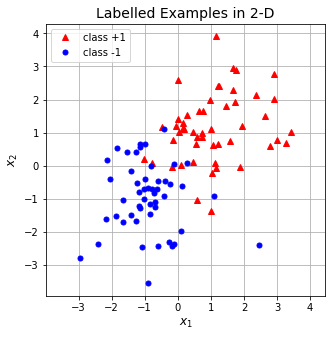

In [3]:
# Generate a binary class dataset
# This code is given to you

np.random.seed(220606)

nx  = 50
mu1 = np.array([1.,1.])
cov1 = np.eye(2)
mu2 = -mu1
cov2 = np.eye(2)

X, Y = multinormaldata(nx, mu1, cov1, mu2, cov2)

plt.figure(figsize=(5,5))
plt.plot(X[:nx,0],X[:nx,1], '^r', markersize=6, linestyle='none', label='class +1')
plt.plot(X[nx:,0],X[nx:,1], 'ob', markersize=5, linestyle='none', label='class -1')
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Labelled Examples in 2-D',fontsize=14)
plt.legend(loc='upper left')
plt.axis([-6, 6, -6, 6])
plt.axis('equal')
plt.grid(True)
plt.show()

**1.2) Train a linear support vector machine on the generated data using $C=1$.**  
a) Plot the separating hyperplane (a line) that separates the two classes (use a solid line).  
b) Plot the two hyperlanes $w^\top x +b = \pm 1$ (use dashed lines).  
c) Mark the support vectors using a circle around each one.

**Note:** Use scikit-learn SVC. When you use SVC, make sure you specify a linear kernel by SVC(kernel='linear'...).

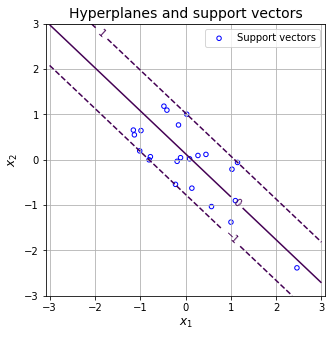

In [4]:
from sklearn import svm
#-------------------------
# This code is given to you
penalty = 1
svm_classifier = svm.SVC(kernel='linear',C=penalty)
svm_classifier.fit(X,Y)
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]
support_vector = svm_classifier.support_vectors_
#-------------------------

# Your Code Here

x_ = y_ = np.linspace(-3, 3, 200)
X_, Y_ = np.meshgrid(x_, y_)
Z_ = w[0] * X_ + w[1] * Y_ + b

plt.figure(figsize=(5,5))
plt.scatter(*support_vector.T, s=20, facecolors='none', edgecolors='b', label='Support vectors')
contour_sep = plt.contour(X_, Y_, Z_, [0])
plt.clabel(contour_sep, inline=1, fontsize=10)
contour_pos = plt.contour(X_, Y_, Z_, [1], linestyles='dashed')
plt.clabel(contour_pos, inline=1, fontsize=10)
contour_neg = plt.contour(X_, Y_, Z_, [-1], linestyles='dashed')
plt.clabel(contour_neg, inline=1, fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Hyperplanes and support vectors', fontsize=14)
plt.legend(loc='upper right')
plt.axis([-3, 3, -3, 3])
plt.axis('equal')
plt.grid(True)
plt.show()

**1.3) Repeat 1.2) using a set of values of $C$ ($10^{-3}$ ~$10^2$).**  
a) Do the same plot as 1.22) for each value of log(C), but leave out the $\pm 1$ hyperplanes (use subplot).  
b) On a separate plot, plot $\|w\|^2$ versus $log(C)$ as $log(C)$ varies over the above interval.  
c) Similarly, plot the number of support vectors vs. $log(C)$.   
d) How does $\|w\|^2$ change as the value of $C$ increases? Why does it change in that way?
e) How does the number of support vectors change as $C$ increases? Why does it change in that way? 


ANS: As C increases, the penalty for outliers increases, and the penalty for large $||w||^2$ decreases relatively. Therefore, $||w||^2$ becomes larger to reduce the hyperplane separation and the number of support vectors becomes smaller.

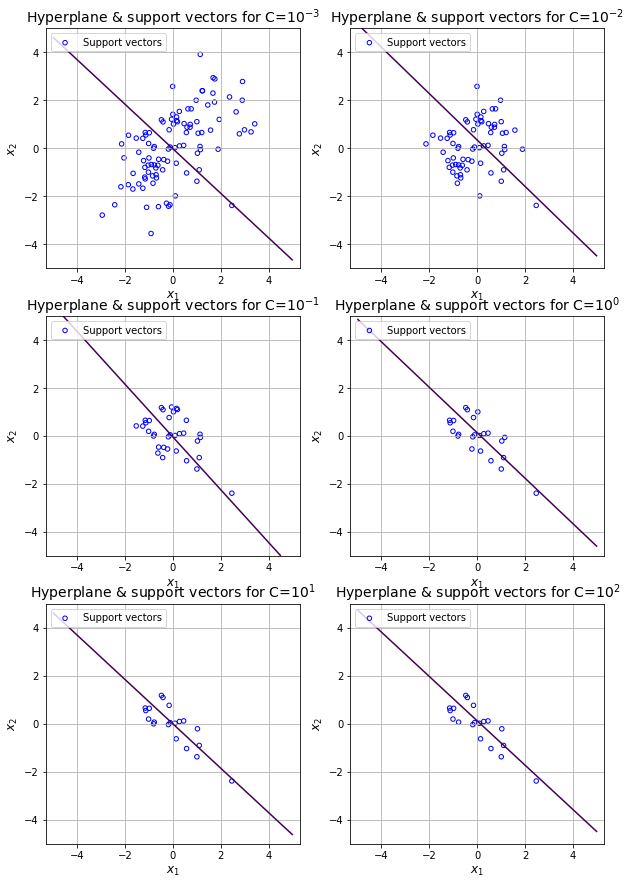

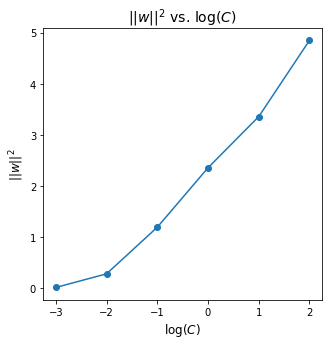

[[0.09749259 0.10477785]
 [0.37263591 0.38450822]
 [0.81044984 0.73554318]
 [1.05744787 1.11385114]
 [1.24595151 1.34422125]
 [1.49641874 1.61534282]]


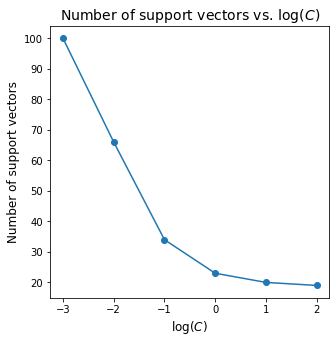

In [5]:
# The plt.subplot command may be useful

# Your Code Here

#-------------------------
# This code is given to you
c_list = np.arange(-3, 3)
C_list = np.exp(c_list * np.log(10))

plt.figure(figsize=(10,15))
for i, (c, C) in enumerate(zip(c_list, C_list)):
    penalty = C
    svm_classifier = svm.SVC(kernel='linear', C=penalty)
    svm_classifier.fit(X,Y)
    w = svm_classifier.coef_[0]
    b = svm_classifier.intercept_[0]
    support_vector = svm_classifier.support_vectors_
    #-------------------------

    # Your Code Here

    x_ = y_ = np.linspace(-5, 5, 200)
    X_, Y_ = np.meshgrid(x_, y_)
    Z_ = w[0] * X_ + w[1] * Y_ + b

    plt.subplot(3, 2, i + 1)
    plt.scatter(*support_vector.T, s=20, facecolors='none', edgecolors='b', label='Support vectors')
    contour_sep = plt.contour(X_, Y_, Z_, [0])
    plt.ylabel('$x_2$', fontsize=12)
    plt.xlabel('$x_1$', fontsize=12)
    plt.title(f'Hyperplane & support vectors for C=$10^{{{c}}}$', fontsize=14)
    plt.legend(loc='upper left')
    plt.axis([-5, 5, -5, 5])
    plt.axis('equal')
    plt.grid(True)

plt.show()

svc_list = [svm.SVC(kernel='linear', C=C) for C in C_list]
for svc in svc_list:
    svc.fit(X, Y)
svm_w_list = np.array([svc.coef_[0] for svc in svc_list])
svm_w_support_vectors_count = np.array([svc.support_vectors_.shape[0] for svc in svc_list])

plt.figure(figsize=(5,5))
plt.plot(c_list, np.linalg.norm(svm_w_list, axis=1) ** 2, 'o-')
plt.ylabel(r'$||w||^2$', fontsize=12)
plt.xlabel(r'$\log(C)$', fontsize=12)
plt.title(r'$||w||^2$ vs. $\log(C)$',fontsize=14)
plt.show()

print(svm_w_list)

plt.figure(figsize=(5,5))
plt.plot(c_list, svm_w_support_vectors_count, 'o-')
plt.ylabel(r'Number of support vectors', fontsize=12)
plt.xlabel(r'$\log(C)$', fontsize=12)
plt.title(r'Number of support vectors vs. $\log(C)$',fontsize=14)
plt.show()

## 2. SVM with Linear and Quadratic Kernels

**2.1) Generate Data**  
(a) Generate data as specified below.  
(b) Plot the data, use a distinct color and marker shape for each class.  
(c) Estimate the expected classification accuracy of linear classifier (give your reasoning) 

ANS: The accuracy would be close to $0.5$ since the second distribution is just the first one rotated, and they are not separable by a plane. The linear classifier could do hardly better than a random one.

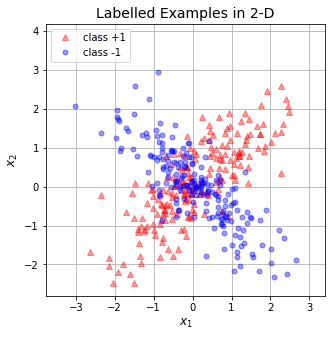

In [6]:
# Generate Training, Validation, and Testing Data
np.random.seed(31415926)
# generate data from two classes:
# first class mean1 = (0,0), Cov1 ~ sigma1 =1, sigma2=1, and correlation rho=0.8 
# second class mean2 = (0,0), Cov2 ~ sigma1 =1, sigma2=1, and correlation rho=-0.8

# generate 200 examples per class of training data and labels
# generate 200 examples per class of validation data and labels
# generate 3000 examples per class of testing data and labels
#----------------------------------------------------------------------------------

# Specify first Gaussian
mu1 = [0.0, 0.0]
sig11 = 1.0
sig12 = 1.0
rho1 = 0.8
cov1 = np.array([[sig11*sig11, sig11*sig12*rho1], [sig11*sig12*rho1, sig12*sig12]])

# Specify second Gaussian
mu2 = [0.0, 0.0]
sig21 = 1.0
sig22 = 1.0
rho2 = -0.8
cov2 = np.array([[sig21*sig21, sig21*sig22*rho2], [sig21*sig22*rho2, sig22*sig22]])

# Generate training data

nx_train = 200
X_train, Y_train = multinormaldata(nx_train, mu1, cov1, mu2, cov2)

# Generate validation data

nx_valid = 200
X_valid, Y_valid = multinormaldata(nx_valid, mu1, cov1, mu2, cov2)

# Generate test examples

nx_test = 3000
X_test, Y_test = multinormaldata(nx_test, mu1, cov1, mu2, cov2)

# Plot the training data

plt.figure(figsize=(5,5))
plt.plot(X_train[:nx_train,0], X_train[:nx_train,1], '^r', markersize=6, linestyle='none', label='class +1', alpha=0.4)
plt.plot(X_train[nx_train:,0], X_train[nx_train:,1], 'ob', markersize=5, linestyle='none', label='class -1', alpha=0.4)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Labelled Examples in 2-D',fontsize=14)
plt.legend(loc='upper left')
plt.axis([-6, 6, -6, 6])
plt.axis('equal')
plt.grid(True)
plt.show()

**2.2) Train a Linear SVM classifier**

(a) Train over values of $log(C)$ from -3 to 3 in steps of 1.  
(b) Plot the resulting training and validation accuracies.  
(c) Use the plot from part (b) to select a value of $C$. Justify your choice.  

ANS: I choose $C=10$ since the validation accuracy attains maximum at this value.

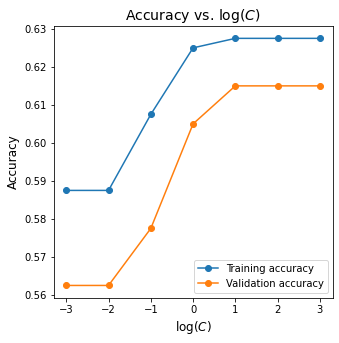

C for maximal training accuracy: 10.000000000000002.
C for maximal validation accuracy: 10.000000000000002.


In [7]:
# Train a linear SVM Classifier

c_list = np.arange(-3, 4)
C_list = np.exp(c_list * np.log(10))

svc_list = [svm.SVC(kernel='linear', C=C) for C in C_list]
for svc in svc_list:
    svc.fit(X_train, Y_train)
svc_train_scores = [svc.score(X_train, Y_train) for svc in svc_list]
svc_valid_scores = [svc.score(X_valid, Y_valid) for svc in svc_list]

plt.figure(figsize=(5,5))
plt.plot(c_list, svc_train_scores, 'o-', label='Training accuracy')
plt.plot(c_list, svc_valid_scores, 'o-', label='Validation accuracy')
plt.ylabel(r'Accuracy', fontsize=12)
plt.xlabel(r'$\log(C)$', fontsize=12)
plt.title(r'Accuracy vs. $\log(C)$',fontsize=14)
plt.legend()
plt.show()

print(f'C for maximal training accuracy: {C_list[np.argmax(svc_train_scores)]}.')
print(f'C for maximal validation accuracy: {C_list[np.argmax(svc_valid_scores)]}.')

**2.3) Use the selected value of $C$ to train a Linear SVM**   
(a) Use all of the training and validation data for training.  
(b) Plot the data, the SVM hyperplane, and the +1 and -1 hyperplanes. Circle the support vectors.   
(c) What is the classification accuracy?  

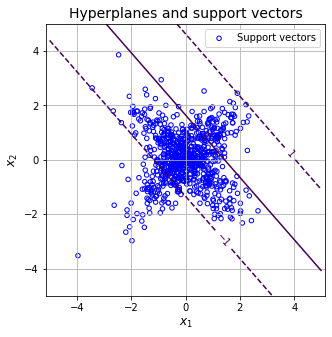

Training accuracy: 0.61875.
Testing accuracy: 0.6016666666666667.


In [8]:
C_optimal = C_list[np.argmax(svc_valid_scores)]

X_train_valid = np.vstack((X_train, X_valid))
Y_train_valid = np.hstack((Y_train, Y_valid))
svc_optimal = svm.SVC(kernel='linear', C=C_optimal)
svc_optimal.fit(X_train_valid, Y_train_valid)

w = svc_optimal.coef_[0]
b = svc_optimal.intercept_[0]
support_vector = svc_optimal.support_vectors_

x_ = y_ = np.linspace(-5, 5, 200)
X_, Y_ = np.meshgrid(x_, y_)
Z_ = w[0] * X_ + w[1] * Y_ + b

plt.figure(figsize=(5,5))
plt.scatter(*support_vector.T, s=20, facecolors='none', edgecolors='b', label='Support vectors')
contour_sep = plt.contour(X_, Y_, Z_, [0])
plt.clabel(contour_sep, inline=1, fontsize=10)
contour_pos = plt.contour(X_, Y_, Z_, [1], linestyles='dashed')
plt.clabel(contour_pos, inline=1, fontsize=10)
contour_neg = plt.contour(X_, Y_, Z_, [-1], linestyles='dashed')
plt.clabel(contour_neg, inline=1, fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Hyperplanes and support vectors', fontsize=14)
plt.legend(loc='upper right')
plt.axis([-5, 5, -5, 5])
plt.axis('equal')
plt.grid(True)
plt.show()

print(f'Training accuracy: {svc_optimal.score(X_train_valid, Y_train_valid)}.')
print(f'Testing accuracy: {svc_optimal.score(X_test, Y_test)}.')

**2.4) Quadratic kernel SVM**  
(a) Repeat part 2.2), except this time use a quadratic kernel in the SVM. See polynomial kernel option.  
(b) Use the validation curve to select a value of $C$. Record and justify your choice below.

ANS: I choose $C=1$ since the validation accuracy attains maximum at this value.

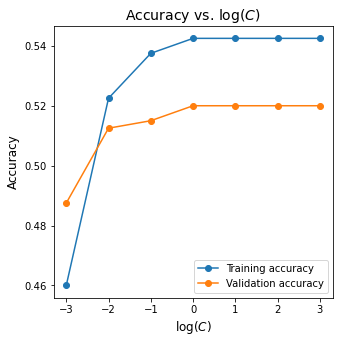

C for maximal training accuracy: 1.0.
C for maximal validation accuracy: 1.0.


In [9]:
# Train a Quadratic Kernel SVM Classifier

c_list = np.arange(-3, 4)
C_list = np.exp(c_list * np.log(10))

svc_list = [svm.SVC(kernel='poly', C=C) for C in C_list]
for svc in svc_list:
    svc.fit(X_train, Y_train)
svc_train_scores = [svc.score(X_train, Y_train) for svc in svc_list]
svc_valid_scores = [svc.score(X_valid, Y_valid) for svc in svc_list]

plt.figure(figsize=(5,5))
plt.plot(c_list, svc_train_scores, 'o-', label='Training accuracy')
plt.plot(c_list, svc_valid_scores, 'o-', label='Validation accuracy')
plt.ylabel(r'Accuracy', fontsize=12)
plt.xlabel(r'$\log(C)$', fontsize=12)
plt.title(r'Accuracy vs. $\log(C)$',fontsize=14)
plt.legend()
plt.show()

print(f'C for maximal training accuracy: {C_list[np.argmax(svc_train_scores)]}.')
print(f'C for maximal validation accuracy: {C_list[np.argmax(svc_valid_scores)]}.')

**2.5) Using the selected value of C retrain on all Training + Validation Data**  
(a) What is the final training and testing accuracy?  
(b) How does this accuracy compare to that of the Linear SVM?

ANS: Lower than that of the linear one.

In [10]:
# Your Code Here

C_optimal = C_list[np.argmax(svc_valid_scores)]

svc_optimal = svm.SVC(kernel='poly', C=C_optimal)
svc_optimal.fit(X_train_valid, Y_train_valid)

print(f'Training accuracy: {svc_optimal.score(X_train_valid, Y_train_valid)}.')
print(f'Testing accuracy: {svc_optimal.score(X_test, Y_test)}.')

Training accuracy: 0.5225.
Testing accuracy: 0.5068333333333334.
